In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns

In [61]:
df = pd.read_csv('iris.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X = df.drop('species', axis =1)
y = df['species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn.predict(X_test)

In [39]:
y_pred

array(['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa'], dtype=object)

In [93]:
def choose_k(X_train, X_test, y_train, y_test, max_k =10):
    k_values = list(range(1, max_k+1))
    accuracy_train = []
    accuracy_test = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train, y_train)

        acc_train = accuracy_score(y_train, knn.predict(X_train))
        acc_test = accuracy_score(y_test, knn.predict(X_test))

        accuracy_train.append(acc_train)
        accuracy_test.append(acc_test)

    plt.figure(figsize=(7,4))
    plt.plot(k_values, accuracy_train, marker = 'o', label = 'train')
    plt.plot(k_values, accuracy_test, marker = 'o', label = 'test')
    plt.legend()
    plt.show()

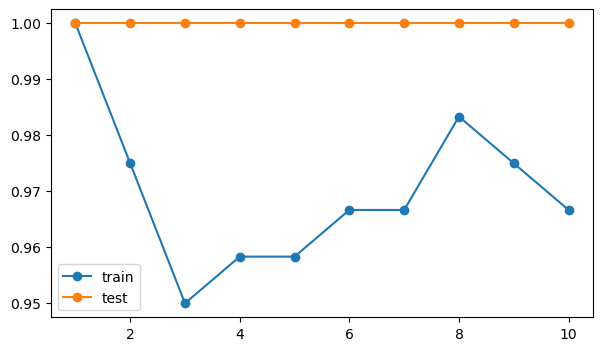

In [95]:
choose_k(X_train, X_test, y_train, y_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
accuracy_score(y_test,y_pred)

1.0

In [73]:
conf_matrix= confusion_matrix(y_test,y_pred)

In [99]:
conf_matrix

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]], dtype=int64)

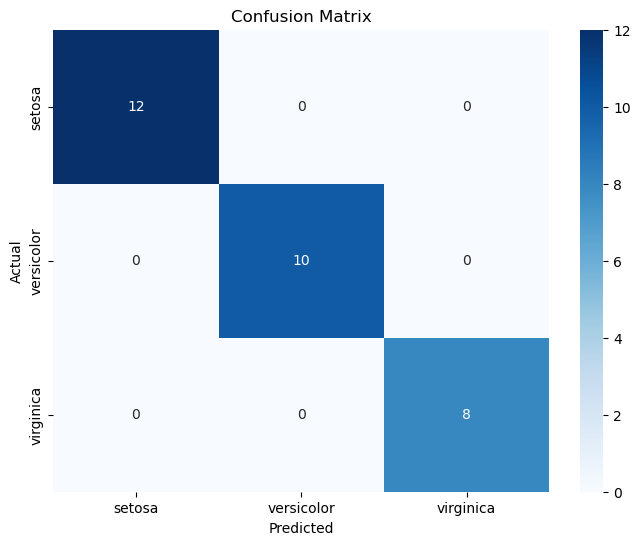

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

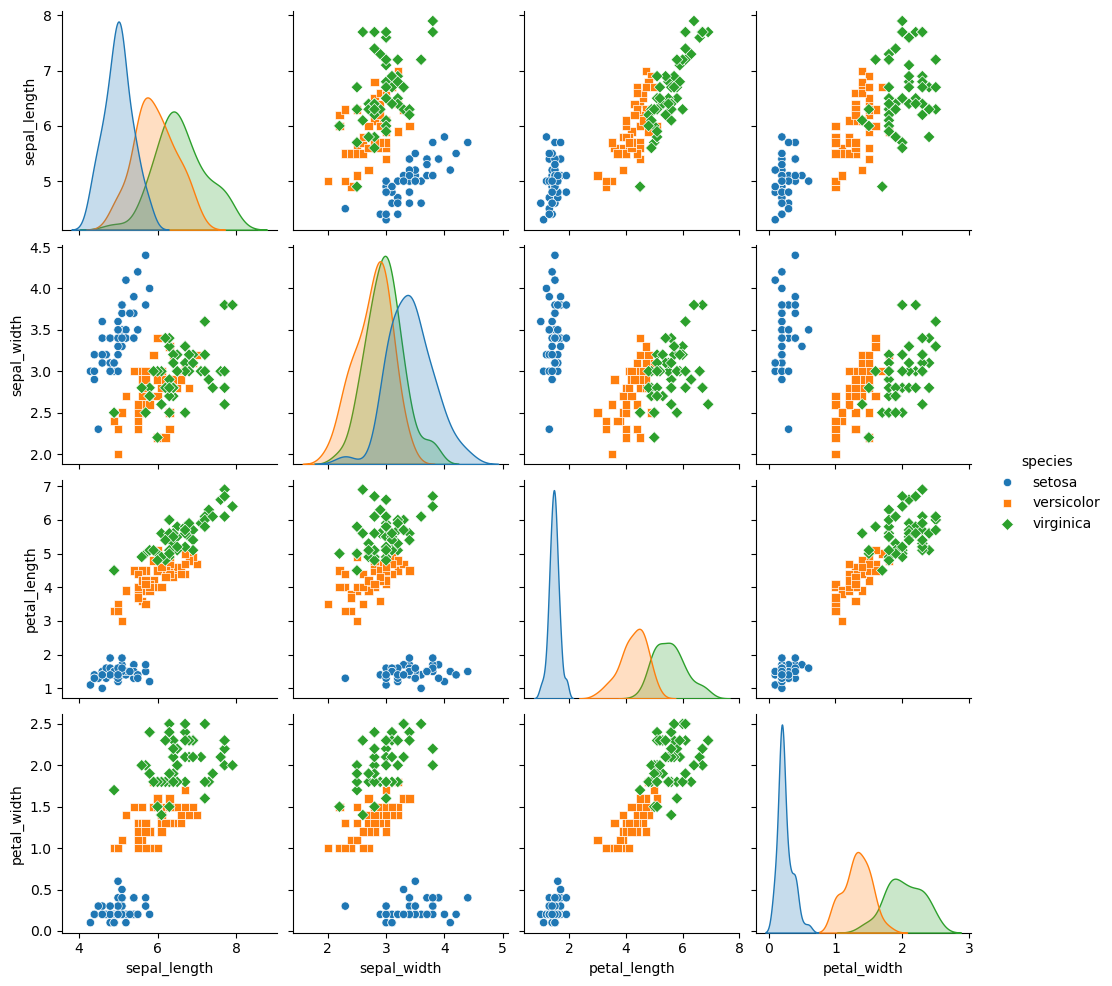

In [83]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()